In [42]:
import os
from dotenv import load_dotenv
import termcolor
load_dotenv()

openai_key = os.getenv("OPENAI_API_KEY")


# Generation of Synthetic Testset

In [3]:
from langchain_community.document_loaders import SeleniumURLLoader


urls = [
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/02/16/luiz-henrique-do-botafogo-tem-lesao-na-panturrilha.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/22/botafogo-completa-um-mes-com-tecnico-interino-veja-pontos-chave-de-fabio-matias.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/21/junior-santos-revela-origem-do-apelido-jacare-no-botafogo.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/20/matheus-nascimento-no-limbo-saiba-como-a-joia-de-r-150-milhoes-virou-terceira-opcao-no-botafogo.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/20/botafogo-projeta-retorno-de-luiz-henrique-e-jeffinho-aos-treinos-apos-folga-na-data-fifa.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/20/botafogo-protocola-recuperacao-extrajudicial-e-inicia-plano-para-quitar-r-400-milhoes-de-dividas-civeis.ghtml",
        "https://ge.globo.com/futebol/libertadores/noticia/2024/03/19/tabela-da-libertadores-2024-veja-data-e-hora-dos-jogos-dos-brasileiros.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/19/p-madre-veja-reacoes-de-rivais-ao-sorteio-do-botafogo-na-libertadores.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/21/botafogo-podera-inscrever-cinco-novos-jogadores-na-libertadores.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/21/efetivar-ou-nao-os-pros-e-contras-de-o-botafogo-permanecer-com-fabio-matias-no-comando-vote.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/20/reforco-do-botafogo-oscar-romero-chega-ao-rio.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/19/botafogo-tenta-adiantar-final-da-taca-rio-veja-como-ficaria-o-calendario.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/19/altitude-e-viagens-longas-a-logistica-do-botafogo-para-os-jogos-da-libertadores.ghtml",
        "https://ge.globo.com/futebol/libertadores/noticia/2024/03/18/presidente-da-conmebol-anuncia-aumento-em-premio-da-libertadores-2024-veja-valor.ghtml" ,
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/26/com-tres-nomes-em-pauta-textor-encerra-entrevistas-por-novo-tecnico-do-botafogo-nesta-terca.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/24/botafogo-vence-time-da-dinamarca-na-estreia-de-torneio-sub-19-nos-estados-unidos.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/24/com-vasco-de-olho-marlon-freitas-nao-se-abala-com-criticas-e-reafirma-importancia-no-botafogo.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/23/por-que-giovanna-waksman-saiu-do-botafogo-entenda-os-planos-de-textor-para-o-fenomeno-do-futebol-feminino.ghtml",
        "https://ge.globo.com/futebol/times/botafogo/noticia/2024/03/25/veja-os-pros-e-contras-de-quique-setien-treinador-alvo-do-botafogo-vote-na-enquete.ghtml"

]
loader = SeleniumURLLoader(urls=urls)
docs = loader.load()

for document in docs:
    document.metadata['filename'] = document.metadata['source']

len(docs)

19

In [4]:
from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

# generator with openai models
generator_llm = ChatOpenAI(model="gpt-3.5-turbo-16k")
critic_llm = ChatOpenAI(model="gpt-4")
embeddings = OpenAIEmbeddings()

generator = TestsetGenerator.from_langchain(
    generator_llm,
    critic_llm,
    embeddings
)

# generate testset
testset = generator.generate_with_langchain_docs(docs, test_size=10, distributions={simple: 0.5, reasoning: 0.25, multi_context: 0.25})

/Users/joaovictorfarrulladarze/Desktop/RAG_Flask/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating: 100%|██████████| 10/10 [08:53<00:00, 53.39s/it]     


In [5]:
questions = testset.to_pandas()['question'].to_list()
ground_truth = testset.to_pandas()['ground_truth'].to_list()
testset.to_pandas()

,question,contexts,ground_truth,evolution_type,episode_done
0,What has been the impact of Fábio Matias' inte...,[Botafogo completa um mês com técnico interino...,"Under the interim role of Fábio Matias, the Bo...",simple,True
1,What were the pressures and expectations place...,[ar fora dos relacionados — Foto: Reprodução\n...,Matheus Nascimento faced the pressure of tryin...,simple,True
2,What factors have contributed to the mismanage...,[Matheus Nascimento no limbo: saiba como a joi...,The mismanagement of Matheus Nascimento's care...,simple,True
3,What challenges did Matheus Nascimento face wh...,[ar fora dos relacionados — Foto: Reprodução\n...,Matheus Nascimento faced challenges such as jo...,simple,True
4,What are the arguments in favor and against th...,[Efetivar ou não? Os prós e contras de o Botaf...,The arguments in favor of the permanent appoin...,simple,True
5,What hindered Matheus Nascimento's progress in...,[ar fora dos relacionados — Foto: Reprodução\n...,Matheus Nascimento's progress in Botafogo was ...,reasoning,True
6,What improvements have happened in Botafogo te...,[Botafogo completa um mês com técnico interino...,"Under Fábio Matias, the Botafogo team has show...",reasoning,True
7,What challenges did Matheus Nascimento face wh...,[ar fora dos relacionados — Foto: Reprodução\n...,Matheus Nascimento faced challenges such as jo...,multi_context,True
8,What has Fábio Matias' interim role done for t...,[Botafogo completa um mês com técnico interino...,Fábio Matias' interim role has contributed to ...,multi_context,True
9,How much has the Libertadores prize money incr...,[Presidente da Conmebol anuncia aumento em prê...,The prize money for the Libertadores has incre...,reasoning,True


# RAG Chain
to generate answers

In [6]:
from langchain import hub
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough, RunnableParallel

In [7]:
# Splitting the documents
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
splits = text_splitter.split_documents(docs)

In [8]:
# save to disk
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings(), persist_directory="./chroma_db")

In [9]:
# load from disk
vectorstore = Chroma(persist_directory="./chroma_db", embedding_function=OpenAIEmbeddings())
vectorstore

vectorstore._collection.count()

190

In [10]:
# RAG Chain
# Retrieve and generate using the relevant snippets of the blog.
retriever = vectorstore.as_retriever()
prompt = hub.pull("rlm/rag-prompt")
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# Evaluating using Testset

In [11]:
from datasets import Dataset

data = {"question": [], "answer": [], "contexts": [], "ground_truth": ground_truth}

for query in questions:
    data["question"].append(query)
    data["answer"].append(rag_chain.invoke(query))
    data["contexts"].append([doc.page_content for doc in retriever.get_relevant_documents(query)])

dataset = Dataset.from_dict(data)

In [12]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
)

In [13]:
from ragas import evaluate

result = evaluate(
    dataset,
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall,
    ],
)

result

Evaluating: 100%|██████████| 40/40 [00:46<00:00,  1.16s/it]


{'context_precision': 0.9167, 'faithfulness': 1.0000, 'answer_relevancy': 0.9274, 'context_recall': 0.8750}

In [14]:
eval_df = result.to_pandas()
eval_df

,question,answer,contexts,ground_truth,context_precision,faithfulness,answer_relevancy,context_recall
0,What has been the impact of Fábio Matias' inte...,"Sob o comando de Fábio Matias, o Botafogo cres...","[No período, no entanto, o clube ainda vivia a...","Under the interim role of Fábio Matias, the Bo...",1.000000,1.0,0.889026,0.75
1,What were the pressures and expectations place...,Matheus Nascimento enfrentou pressões incomuns...,[O que eu acho que bateu um pouquinho foi essa...,Matheus Nascimento faced the pressure of tryin...,1.000000,1.0,0.928031,1.00
2,What factors have contributed to the mismanage...,A transição para o profissional em um momento ...,[O que eu acho que bateu um pouquinho foi essa...,The mismanagement of Matheus Nascimento's care...,1.000000,1.0,0.929704,1.00
3,What challenges did Matheus Nascimento face wh...,Matheus Nascimento enfrentou a pressão de ser ...,[O que eu acho que bateu um pouquinho foi essa...,Matheus Nascimento faced challenges such as jo...,1.000000,1.0,0.906818,1.00
4,What are the arguments in favor and against th...,A favor da efetivação de Fábio Matias como tre...,[Efetivar ou não? Os prós e contras de o Botaf...,The arguments in favor of the permanent appoin...,0.500000,1.0,0.911434,0.75
5,What hindered Matheus Nascimento's progress in...,Matheus Nascimento's progress in Botafogo was ...,[O que eu acho que bateu um pouquinho foi essa...,Matheus Nascimento's progress in Botafogo was ...,1.000000,1.0,0.991695,0.50
6,What improvements have happened in Botafogo te...,"Under Fábio Matias, Botafogo has seen improvem...",[Fase artilheira de Júnior Santos\n\nBotafogo ...,"Under Fábio Matias, the Botafogo team has show...",1.000000,1.0,0.927202,1.00
7,What challenges did Matheus Nascimento face wh...,Matheus Nascimento enfrentou desafios ao entra...,[O que eu acho que bateu um pouquinho foi essa...,Matheus Nascimento faced challenges such as jo...,0.833333,1.0,0.965794,1.00
8,What has Fábio Matias' interim role done for t...,O trabalho de Fábio Matias como interino do Bo...,"[No período, no entanto, o clube ainda vivia a...",Fábio Matias' interim role has contributed to ...,1.000000,1.0,0.881548,0.75
9,How much has the Libertadores prize money incr...,The Libertadores prize money for 2024 has incr...,[Presidente da Conmebol anuncia aumento em prê...,The prize money for the Libertadores has incre...,0.833333,1.0,0.942399,1.00


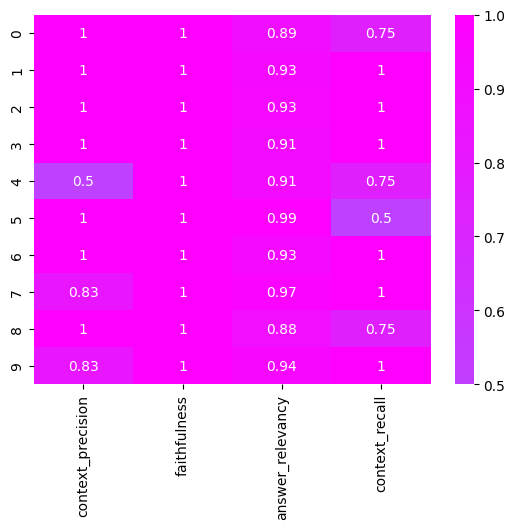

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# make a confusion matrix
sns.heatmap(eval_df.iloc[:, -4:], annot=True, cmap="cool", center=0)
# save the plot
plt.savefig("./evals/confusion_matrix.png", dpi=300, bbox_inches="tight")

In [78]:
for i, row in eval_df.iloc[4:5].iterrows():
    #  make question blue
    print(f"Question:" + termcolor.colored(f"{row['question']}", "blue"))
    print(f"    Answer:" + termcolor.colored(f"{row['answer']}", "green"))
    for j, context in enumerate(row['contexts']):
        print(f"    Context {j+1}:" + termcolor.colored(f"{context}", "yellow"))
        print("\n")
    print(f"    Ground Truth:" + termcolor.colored(f"{row['ground_truth']}", "red"))
    print("\n")

Question:What are the arguments in favor and against the permanent appointment of Fábio Matias as the coach of Botafogo?
    Answer:A favor da efetivação de Fábio Matias como treinador do Botafogo estão o conhecimento do elenco, a boa fase da equipe sob seu comando e o custo-benefício de manter um técnico com salário mais baixo. Contra a efetivação, há a falta de experiência de Matias no futebol profissional.
    Context 1:Efetivar ou não? Os prós e contras de o Botafogo permanecer com Fábio Matias no comando; vote

Interino vai completar um mês no cargo na próxima sexta-feira

Por Redação do ge — Rio de Janeiro

21/03/2024 05h02    Atualizado há 5 dias

A pausa para a Data Fifa é também um período de decisões para o Botafogo, mas fora de campo. A direção do clube usa os dias sem jogos para definir quem será o novo treinador e também o novo diretor de futebol, após a saída de Tiago Nunes e André Mazzuco, respectivamente.

+ ✅Clique aqui para seguir o novo canal ge Botafogo no WhatsApp


In [56]:
os.makedirs("./evals", exist_ok=True)
eval_df.to_csv("./evals/evaluation.csv")

In [79]:
# save image of confusion matrix
plt.savefig("./evals/confusion_matrix.png")

<Figure size 640x480 with 0 Axes>